In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

# Suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'


data = pd.read_csv("mudah-apartment-kl-selangor.csv")
data

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,100493687,Pangsapuri Gapura Bayu,NaN,RM 1 200 per month,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000 sq.ft.,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor
19987,100371347,BSP 21,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor
19988,100493228,Ameera Residence,NaN,RM 1 350 per month,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19989,100235153,The Arc @ Cyberjaya,NaN,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor


### Data Cleaning & Preprocessing

In [44]:
# Display basic dataset information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()


Dataset Shape: (19991, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3

Remove Irrevelant Rows

In [45]:
data = data.drop(columns=['ads_id', 'prop_name', 'location','facilities','additional_facilities','region'])

In [46]:
data

,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished
0,2022.0,RM 4 200 per month,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished
1,NaN,RM 2 300 per month,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished
2,NaN,RM 1 000 per month,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished
3,2020.0,RM 1 700 per month,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished
4,NaN,RM 1 299 per month,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished
...,...,...,...,...,...,...,...,...
19986,NaN,RM 1 200 per month,Apartment,3.0,NaN,2.0,1000 sq.ft.,Partially Furnished
19987,2018.0,RM 1 300 per month,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished
19988,NaN,RM 1 350 per month,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished
19989,NaN,RM 1 200 per month,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished


Removing non numerical objects in numerical attributes

In [47]:
import pandas as pd

# Example DataFrame
# df = pd.read_csv('your_dataset.csv')  # Uncomment and use your actual dataset
data['monthly_rent'] = data['monthly_rent'].str.replace(r'[^\d.]', '', regex=True)  # Remove all non-numeric characters
data['monthly_rent'] = pd.to_numeric(data['monthly_rent'], errors='coerce')  # Convert to float, set invalid values as NaN

data['size'] = data['size'].str.extract(r'([\d,.]+)')  # Extract numeric portion (digits, comma, or decimal)
data['size'] = data['size'].str.replace(',', '', regex=True)  # Remove commas (e.g., "1,842" -> "1842")
data['size'] = pd.to_numeric(data['size'], errors='coerce')  # Convert to float, invalid entries become NaN

data['rooms'] = pd.to_numeric(data['rooms'], errors='coerce')  # Convert to float, set invalid values as NaN


In [48]:
# Print the count of missing (null) values in each column of the 'data' DataFrame
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


completion_year    9185
monthly_rent          2
property_type         0
rooms                 8
parking            5702
bathroom              6
size                  0
furnished             5
dtype: int64

In [49]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Sort columns by missing value percentage in descending order for better visibility
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

missing_percentage_sorted

completion_year    45.945676
parking            28.522835
rooms               0.040018
bathroom            0.030014
furnished           0.025011
monthly_rent        0.010005
dtype: float64

In [50]:
# Drop rows with NaN values
data = data.dropna().reset_index(drop=True)

# Display the first few rows to confirm
print(data.head())


   completion_year  monthly_rent      property_type  rooms  parking  bathroom  \
0           2022.0        4200.0        Condominium    5.0      2.0       6.0   
1           2020.0        1700.0          Apartment    2.0      1.0       2.0   
2           2018.0        1550.0  Service Residence    1.0      1.0       1.0   
3           2014.0        1400.0          Apartment    2.0      1.0       1.0   
4           2022.0        2000.0  Service Residence    4.0      2.0       2.0   

   size            furnished  
0  1842      Fully Furnished  
1   743  Partially Furnished  
2   700      Fully Furnished  
3   750      Fully Furnished  
4  1100  Partially Furnished  


In [51]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8235 entries, 0 to 8234
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   completion_year  8235 non-null   float64
 1   monthly_rent     8235 non-null   float64
 2   property_type    8235 non-null   object 
 3   rooms            8235 non-null   float64
 4   parking          8235 non-null   float64
 5   bathroom         8235 non-null   float64
 6   size             8235 non-null   int64  
 7   furnished        8235 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 514.8+ KB


,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished
0,2022.0,4200.0,Condominium,5.0,2.0,6.0,1842,Fully Furnished
1,2020.0,1700.0,Apartment,2.0,1.0,2.0,743,Partially Furnished
2,2018.0,1550.0,Service Residence,1.0,1.0,1.0,700,Fully Furnished
3,2014.0,1400.0,Apartment,2.0,1.0,1.0,750,Fully Furnished
4,2022.0,2000.0,Service Residence,4.0,2.0,2.0,1100,Partially Furnished


In [52]:
# Check for duplicates
print("\nDuplicate Rows:")
data.duplicated().sum() 


Duplicate Rows:


2163

In [53]:
# Remove duplicates
data = data.drop_duplicates()

# Optionally, you can reset the index after removing duplicates
data.reset_index(drop=True, inplace=True)

print("\nAfter Remove Duplicate Rows:")
data.duplicated().sum()


After Remove Duplicate Rows:


0

In [54]:
# Check for irrelevant data (e.g., columns with the same value for all rows)
print("\nColumns with Single Unique Value:")
found = False  # Flag to check if any column with a single unique value is found

for col in data.columns:
    if data[col].nunique() == 1:
        print(col)
        found = True  # Set the flag to True if a column is found with a single unique value

# Print message if no column with a single unique value is found
if not found:
    print("No columns with single unique value found.")


Columns with Single Unique Value:
No columns with single unique value found.


Seperate the unique facilities in facilities to binary columns

Encoding all the column of "Object" type

In [56]:
from sklearn.preprocessing import OrdinalEncoder

# Select all columns with object type
categorical_cols = data.select_dtypes(include=['object']).columns

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical columns
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])

# Display the updated DataFrame
print(data.head())


   completion_year  monthly_rent  property_type  rooms  parking  bathroom  \
0           2022.0        4200.0            1.0    5.0      2.0       6.0   
1           2020.0        1700.0            0.0    2.0      1.0       2.0   
2           2018.0        1550.0            5.0    1.0      1.0       1.0   
3           2014.0        1400.0            0.0    2.0      1.0       1.0   
4           2022.0        2000.0            5.0    4.0      2.0       2.0   

   size  furnished  
0  1842        0.0  
1   743        2.0  
2   700        0.0  
3   750        0.0  
4  1100        2.0  


### PCA

In [60]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target 
X = data.drop('monthly_rent', axis=1)
y = data['monthly_rent']


In [61]:
# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X

,completion_year,property_type,rooms,parking,bathroom,size,furnished
0,1.092960,-0.640377,2.777812,0.885181,6.807738,-0.012164,-0.948225
1,0.802645,-1.127276,-0.796436,-0.800772,0.096436,-0.013020,1.176751
2,0.512330,1.307217,-1.987852,-0.800772,-1.581389,-0.013054,-0.948225
3,-0.068300,-1.127276,-0.796436,-0.800772,-1.581389,-0.013015,-0.948225
4,1.092960,1.307217,1.586396,0.885181,0.096436,-0.012742,1.176751
...,...,...,...,...,...,...,...
6067,-0.794087,1.307217,-0.796436,-0.800772,0.096436,-0.012992,-0.948225
6068,0.947803,-0.640377,0.394980,0.885181,0.096436,-0.012809,1.176751
6069,0.657488,1.307217,-0.796436,0.885181,-1.581389,-0.013245,-0.948225
6070,0.512330,1.307217,1.586396,0.885181,1.774262,-0.012487,1.176751


Initialize PCA and specify number of components to retain. Since we do not know the best number of principal components that capture most variance of the data, we will find 7 PCs based on the dimensions we have. 

In [63]:
# Perform PCA
pca = PCA(n_components=7)
pca_result = pca.fit_transform(scaled_X)
pca_result


array([[ 6.00874776,  1.0124565 , -0.93146361, ...,  0.98909213,
        -2.37411452, -2.61870411],
       [-0.23714171, -0.46620713, -0.29560888, ..., -1.02211897,
        -0.79359877, -0.85445267],
       [-3.0544274 ,  0.65730155,  0.09168056, ...,  0.08461678,
         0.04242827, -0.17780265],
       ...,
       [-1.68491504,  1.57416461,  0.19215684, ..., -0.15516761,
         0.88131131,  0.69732238],
       [ 2.14769613,  1.38328635, -0.85678215, ...,  1.48606889,
        -0.18581241, -0.06944379],
       [-2.79416471,  0.5951012 , -0.34562593, ...,  0.85906668,
         0.46427186, -0.32802667]])

Retrieve the explained variance ratio for each principal component from the fitted PCA model. Explained variance ratio represents the proportion of the total variance in the original data captured by each principal component. The first principal component (PC1) explains 29.56% (0.29562032) of the variance. This is the most informative component, capturing the largest source of variation in the data.

In [64]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Get the principal components
principal_components = pca.components_
principal_components = pd.DataFrame(principal_components, columns=X.columns)
principal_components.index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
principal_components


Explained variance ratio: [0.29562032 0.20276009 0.14957491 0.1392739  0.09738009 0.07144138
 0.0439493 ]


,completion_year,property_type,rooms,parking,bathroom,size,furnished
PC1,-0.063701,-0.299941,0.609191,0.387299,0.591217,0.044934,0.182503
PC2,0.672571,0.499867,-0.032081,0.508610,0.027823,0.186010,-0.051911
PC3,-0.257208,-0.181772,-0.122674,0.168533,-0.110636,0.897448,-0.199244
PC4,0.111021,-0.059294,-0.072756,-0.060198,-0.210344,0.204582,0.942944
PC5,-0.443560,0.780144,0.176501,-0.228745,0.265319,0.158454,0.125103
PC6,-0.517879,0.093493,-0.240280,0.711925,-0.237054,-0.301642,0.106329
PC7,-0.012830,0.079029,0.720158,0.011258,-0.683093,0.004341,-0.090555


The dataframe above shows the loadings for each principal component (PC) on the original features. It indicates how much that original feature contributes to the formation of that principal component.

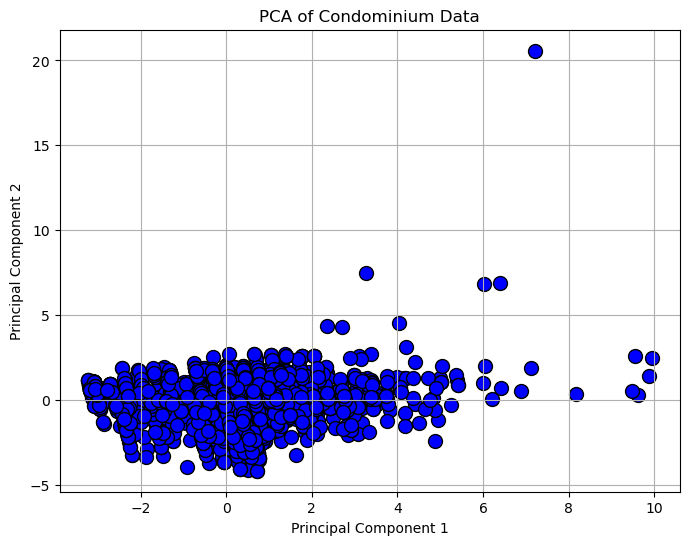

In [65]:
import matplotlib.pyplot as plt

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Condominium Data')
plt.grid(True)
plt.show()

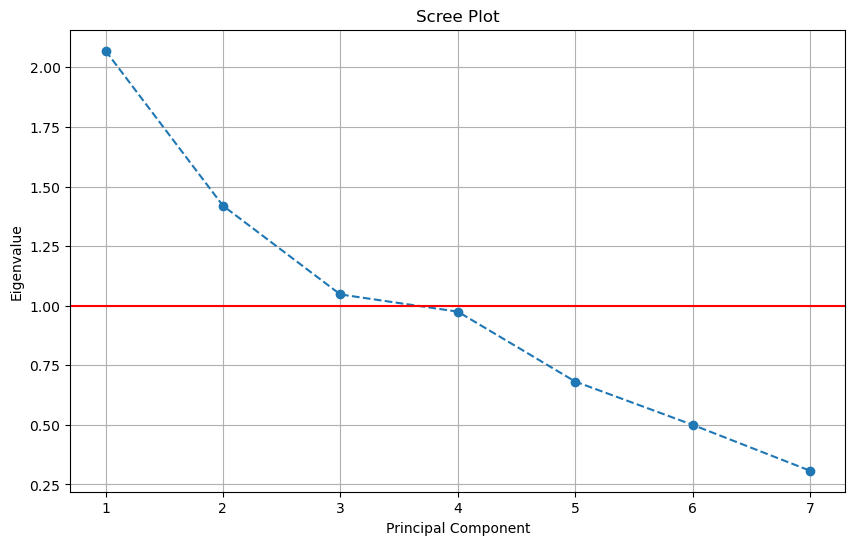

In [66]:
# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

In [68]:
X_ = np.array(pca_result[:,0]).reshape(-1,1)
y = np.array(y).reshape(-1,1)

print(X_.shape)
print(y.shape)


(6072, 1)
(6072, 1)
